In [28]:
import model1
import json
import model2
path = "sample.json"
path = path if path != "" else path
print('Получение результатов первой модели:')
result1 = model1.get_result(path)



Получение результатов первой модели:


100%|██████████| 412/412 [03:07<00:00,  2.20it/s]


In [29]:
print('Получени результатов второй модели:')
result2 = model2.get_result(path)

Получени результатов второй модели:


100%|██████████| 412/412 [00:27<00:00, 15.08it/s]


In [30]:
with open('result1.json', 'w') as file:
    json.dump(result1, file, ensure_ascii=False, indent=4)
with open('result2.json', 'w') as file:
    json.dump(result2, file, ensure_ascii=False, indent=4)
import json
import re
from tqdm import tqdm

with open(path, 'r') as file:
    data = json.load(file)
clean = data
data = [sentence['text'].lower() for sentence in data]
data = [re.sub(r'[,\.\?\!\-]', '', sentence) for sentence in data]
clean = [item['text'] for item in clean]

best_weights = [0.35, 0.7]
threshold = 0.7
result_dict = {key : [] for key in data}
for i in range(len(result1)):
    final_score = best_weights[0] * result1[i][2] + best_weights[1] * result2[i][2]
    if final_score > threshold:
        result_dict[data[result1[i][0]]].append(data[result1[i][1]])

y = [86.21248986212491, 91.56528791565287, ]

In [55]:
import numpy as np
with open('target.json', 'r') as file:
    target = json.load(file)
def compare(array1, array2):
    max_score = max(len(array1), len(array2))
    if max_score == 0:
        return 100

    score = max_score
    for elem in array1:
        if elem not in array2:
            score -= 1
    for elem in array2:
        if elem not in array1:
            score -= 1

    return score / max_score * 100
n = 40
weight1 = np.arange(1.0 / n, 1.0000001, 1.0 / n)
weight2 = np.arange(1.0 / n, 1.0000001, 1.0 / n)
best_weights1 = (weight1[0], weight2[0])
best_score = 0
best_result_dict = {}
threshold = 0.7
result_dict = {key : [] for key in data}
        
for w1 in tqdm(weight1):
    for w2 in weight2:
        result_dict = {key : [] for key in data}
        for i in range(len(result1)):
            final_score = w1 * result1[i][2] + w2 * result2[i][2]
            if final_score > threshold:
                result_dict[data[result1[i][0]]].append(data[result1[i][1]])
        
        score = 0
        for key in result_dict.keys():
            score += compare(result_dict[key], target[key])
        score /= float(len(target))
        if score >= best_score:
            best_weights = (w1, w2)
            best_score = score
            best_result_dict = result_dict
print(best_weights, best_score)


  0%|          | 0/40 [00:00<?, ?it/s]

100%|██████████| 40/40 [02:01<00:00,  3.03s/it]

(0.8750000000000001, 0.07500000000000001) 92.7007299270073


In [56]:
best_weights = [0.75, 0.35]
result_dict = {key : [] for key in data}
for i in range(len(result1)):
    final_score = best_weights[0] * result1[i][2] + best_weights[1] * result2[i][2]
    if final_score > threshold:
        result_dict[data[result1[i][0]]].append(data[result1[i][1]])
def get_score(array1, array2):
    max_score = max(len(array1), len(array2))
    if max_score == 0:
        return 100

    score = max_score
    for elem in array1:
        if elem not in array2:
            score -= 1
    for elem in array2:
        if elem not in array1:
            score -= 1

    return score / max_score * 100
score = 0
for key in result_dict.keys():
    score += get_score(result_dict[key], target[key])
score /= float(len(target))
score

86.77480400108136

In [ ]:
import time
import json
import model1
import model2
import re
import clast
from tqdm import tqdm
path = "sample.json"
def ens(perc):
    start_time = time.time()
    result1 = model1.get_result(path, perc)
    result2 = model2.get_result(path, perc)
    with open(path, 'r') as file:
        data = json.load(file)
    clean = data
    data = [sentence['text'].lower() for sentence in data]
    data = [re.sub(r'[,\.\?\!\-]', '', sentence) for sentence in data]
    clean = [item['text'] for item in clean]

    best_weights = [0.8, 0.2]
    threshold = 0.7
    result_dict = {key : [] for key in data}
    for i in range(len(result1)):
        final_score = best_weights[0] * result1[i][2] + best_weights[1] * result2[i][2]
        if final_score > threshold:
            result_dict[data[result1[i][0]]].append(data[result1[i][1]])
    return time.time() - start_time
def clastik(perc):
    start_time = time.time()
    with open(path, 'r') as file:
        data = json.load(file)
    clean = data
    data = [sentence['text'].lower() for sentence in data]
    data = [re.sub(r'[,\.\?\!\-]', '', sentence) for sentence in data]
    data = data[:int(len(data) * perc / 100)]
    clean = [item['text'] for item in clean]
    result = clast.dbscan(data)
    return time.time() - start_time
def modeli1(perc):
    start_time = time.time()
    result1 = model1.get_result(path, perc)
    return time.time() - start_time
def modeli2(perc):
    start_time = time.time()
    result1 = model1.get_result(path, perc)
    return time.time() - start_time
timeEns, timeCl, time1, time2, timeSx = [], [], [], [], []
funki = [ens, clastik, modeli1, modeli2]
times = [timeEns, timeCl, time1, time2, timeSx]
for fun,timing in zip(funki, times):
    for p in range(10, 101, 10):
        execution_time = fun(p)
        timing.append(execution_time)
        


100%|██████████| 412/412 [03:15<00:00,  2.11it/s]


In [ ]:
import method5
def soundx(p):
    start_time = time.time()
    result = method5.getResult(path = 'sample.json', percentage=p)
    return time.time() - start_time

for p in range(10, 101, 10):
    execution_time = soundx(p)
    timeSx.append(execution_time)

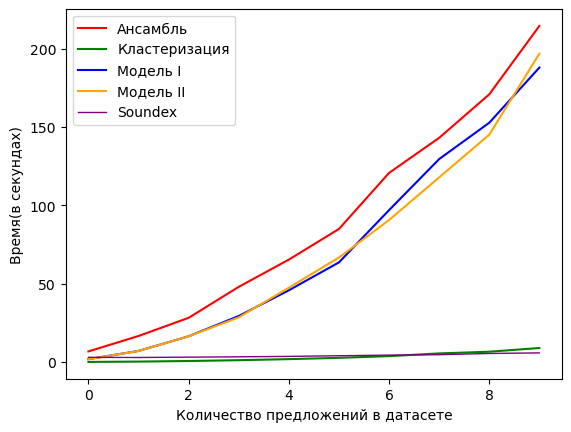

In [63]:
import matplotlib.pyplot as plt

labels = ['Ансамбль', 'Кластеризация', 'Модель I', 'Модель II', 'Soundex',]
colors = ['red', 'green', 'blue', 'orange', 'purple' ]

for i, time_list in enumerate(times):
    if labels[i] == "Soundex":
        plt.plot(time_list, color=colors[i], label=labels[i], linewidth=1)
    else: plt.plot(time_list, color=colors[i], label=labels[i])

plt.xlabel('Количество предложений в датасете')
plt.ylabel('Время(в секундах)')
plt.legend()

plt.show()


In [31]:
result5 = method5.getResult()

In [5]:
def get_score(array1, array2):
    max_score = max(len(array1), len(array2))
    if max_score == 0:
        return 100

    score = max_score
    for elem in array1:
        if elem not in array2:
            score -= 1
    for elem in array2:
        if elem not in array1:
            score -= 1

    return score / max_score * 100

with open('target.json', 'r') as file:
    target = json.load(file)

import model1
result1 = model1.get_result()
threshold = 0.6
path = "sample.json"
with open(path, 'r') as file:
    data = json.load(file)
clean = data
data = [sentence['text'].lower() for sentence in data]
data = [re.sub(r'[,\.\?\!\-]', '', sentence) for sentence in data]
clean = [item['text'] for item in clean]
result_dict = {key : [] for key in data}
for i in range(len(result1)):
    if result1[i][2] > threshold:
            result_dict[data[result1[i][0]]].append(data[result1[i][1]])
score = 0
for key in result_dict.keys():
    score += get_score(result_dict[key], target[key])
score /= float(len(target))
with open('result1.json', 'w') as file:
    json.dump(result_dict, file, ensure_ascii=False, indent=4)
score

100%|██████████| 412/412 [03:17<00:00,  2.09it/s]


89.58637469586375

In [4]:
import method5
result5 = method5.getResult("sample.json")
with open('target.json', 'r') as file:
    target = json.load(file)
print(result5)

threshold = 0.1
path = "sample.json"
with open(path, 'r') as file:
    data = json.load(file)
clean = data
data = [sentence['text'].lower() for sentence in data]
data = [re.sub(r'[,\.\?\!\-]', '', sentence) for sentence in data]
clean = [item['text'] for item in clean]
result_dict = {key : [] for key in data}
for i in range(len(result5)):
    if result5[i][2] > threshold:
            result_dict[data[result5[i][0]]].append(data[result5[i][1]])
score = 0
for key in result_dict.keys():
    score += get_score(result_dict[key], target[key])
score /= float(len(target))
with open('result5.json', 'w') as file:
    json.dump(result_dict, file, ensure_ascii=False, indent=4)
score

[(1, 14, 0.21541950113378683), (1, 149, 0.28798185941043086), (1, 171, 0.15136054421768708), (1, 233, 0.2040816326530612), (2, 265, 0.7142857142857143), (4, 69, 0.1626984126984127), (4, 171, 0.17857142857142858), (13, 100, 0.7142857142857143), (14, 1, 0.21541950113378683), (14, 171, 0.1626984126984127), (14, 233, 0.21541950113378683), (18, 70, 0.7142857142857143), (18, 113, 0.23968253968253966), (18, 260, 0.23968253968253966), (19, 393, 0.3333333333333333), (22, 33, 0.37142857142857144), (22, 213, 0.37142857142857144), (22, 344, 0.30918367346938774), (23, 139, 0.17857142857142858), (24, 85, 0.163265306122449), (28, 200, 0.30952380952380953), (29, 362, 0.2285714285714286), (33, 22, 0.37142857142857144), (33, 213, 0.37142857142857144), (33, 266, 0.163265306122449), (33, 344, 0.30918367346938774), (34, 253, 0.47619047619047616), (35, 401, 0.28798185941043086), (36, 195, 0.5394557823129251), (37, 352, 0.163265306122449), (39, 209, 0.163265306122449), (40, 144, 0.163265306122449), (43, 407,

53.57432510717182

In [1]:
import json
import re
import model2
result2 = model2.get_result("sample.json")
with open('target.json', 'r') as file:
    target = json.load(file)

def get_score(array1, array2):
    max_score = max(len(array1), len(array2))
    if max_score == 0:
        return 100

    score = max_score
    for elem in array1:
        if elem not in array2:
            score -= 1
    for elem in array2:
        if elem not in array1:
            score -= 1

    return score / max_score * 100

threshold = 1
path = "sample.json"
with open(path, 'r') as file:
    data = json.load(file)
clean = data
data = [sentence['text'].lower() for sentence in data]
data = [re.sub(r'[,\.\?\!\-]', '', sentence) for sentence in data]
clean = [item['text'] for item in clean]
result_dict = {key : [] for key in data}
for i in range(len(result2)):
    if result2[i][2] > threshold:
            result_dict[data[result2[i][0]]].append(data[result2[i][1]])
score = 0
for key in result_dict.keys():
    score += get_score(result_dict[key], target[key])
score /= float(len(target))
with open('result2.json', 'w') as file:
    json.dump(result_dict, file, ensure_ascii=False, indent=4)
score

c:\Users\fktrc\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


FileNotFoundError: [Errno 2] No such file or directory: 'CLEAN\\bdnames.txt'

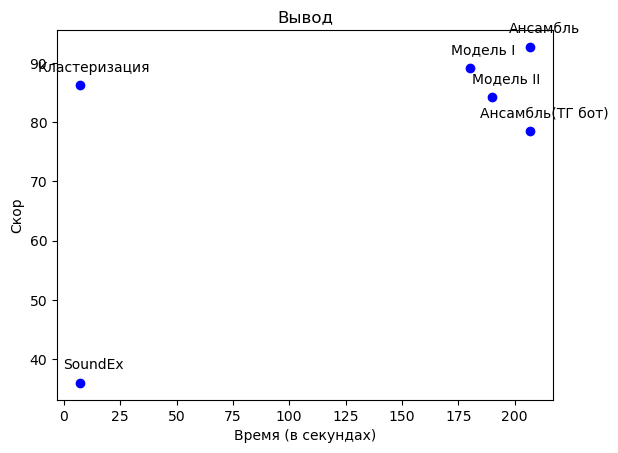

In [3]:
import matplotlib.pyplot as plt
labels = ['Ансамбль', 'Ансамбль(ТГ бот)', 'SoundEx', 'Кластеризация', 'Модель I', 'Модель II']
y=[92.7007299270073, 78.5620097663893, 36.009732360097324 , 86.21248986212491, 89.09975669099757, 84.30077627157918]
x = [207, 207, 7, 7, 180, 190]
# Create a scatter plot
plt.scatter(x, y, color='blue')

# Add labels to each point
for i, label in enumerate(labels):
    plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(10,10), ha='center')

# Set axis labels and title
plt.xlabel('Время (в секундах)')
plt.ylabel('Скор')
plt.title('Вывод')

plt.show()